In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
% matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [66]:
data = pd.read_csv("Mall_Customers.csv")
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [68]:
# checking if there is any NULL data

data.isnull().any().any()

False

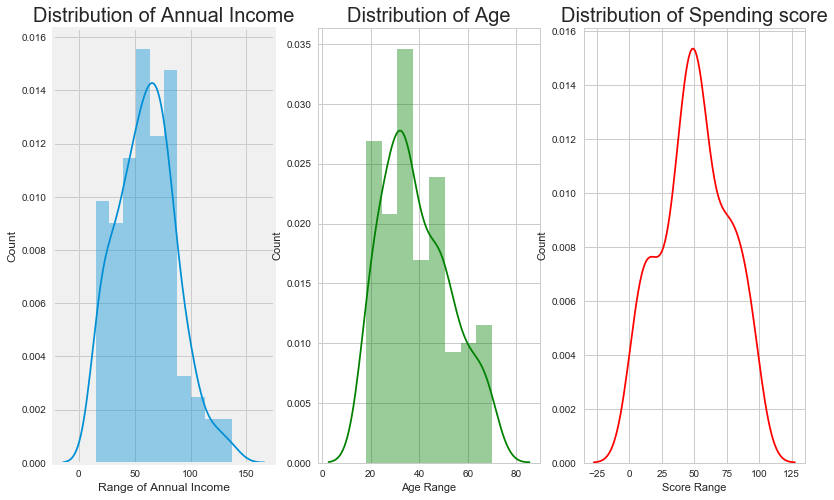

In [69]:
plt.rcParams['figure.figsize'] = (12, 8)

plt.subplot(1, 3, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'green')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Age Range')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.set(style = 'whitegrid')
sns.distplot(data['Spending Score (1-100)'], color = 'red', hist=False)
plt.title('Distribution of Spending score', fontsize = 20)
plt.xlabel('Score Range')
plt.ylabel('Count')
plt.show()

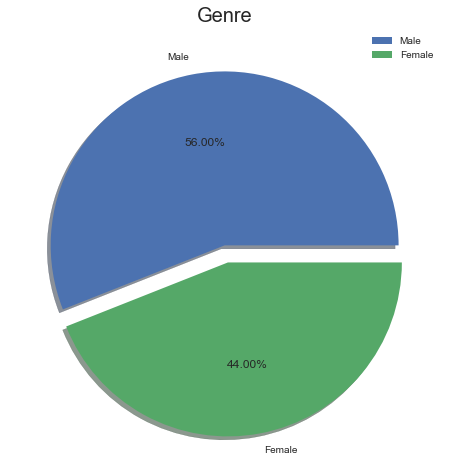

In [70]:
labels = ['Male','Female']
size=data['Genre'].value_counts()
explode=[0,0.1]
plt.pie(size, explode=explode, labels=labels, colors=None, autopct='%.2f%%', shadow=True)
plt.title('Genre', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

By looking at the above pie chart which explains about the distribution of Gender in the Mall

Interestingly, The Females are in the lead with a share of 56% whereas the Males have a share of 44%, that's a huge gap specially when the population of Males is comparatively higher than Females.

<function matplotlib.pyplot.show>

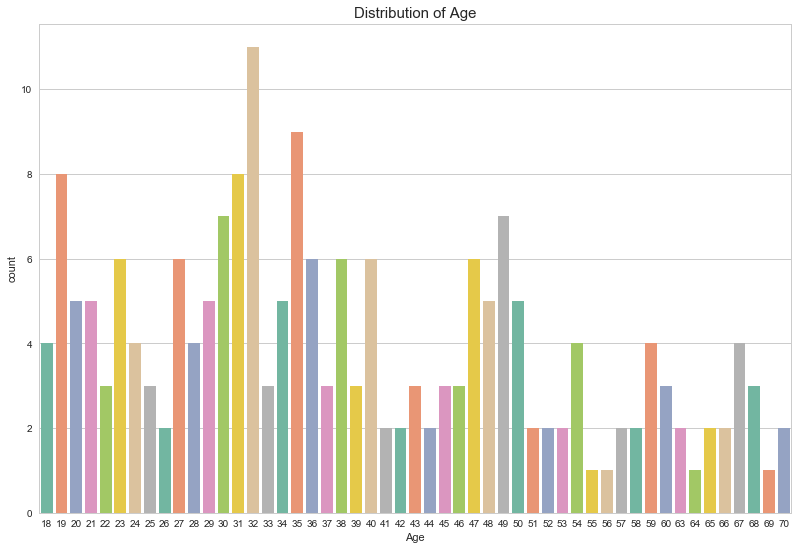

In [71]:
plt.rcParams['figure.figsize']=(12,9)
sns.countplot(data['Age'],palette='Set2')
plt.title('Distribution of Age', fontsize = 15)
plt.show

<function matplotlib.pyplot.show>

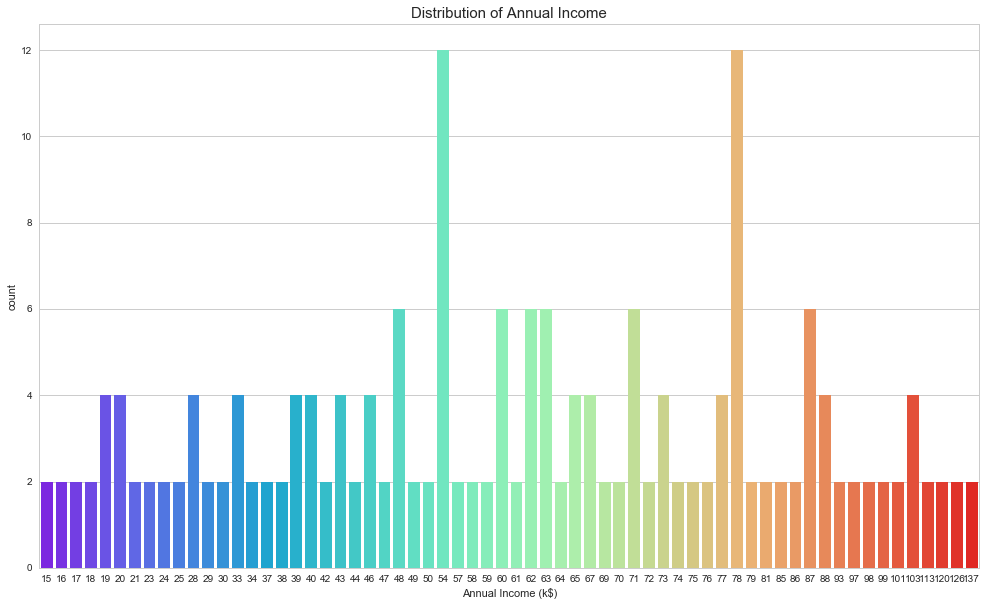

In [72]:
plt.rcParams['figure.figsize']=(15,10)
sns.countplot(data['Annual Income (k$)'],palette='rainbow')
plt.title('Distribution of Annual Income', fontsize = 15)
plt.show

This is also a chart to better explain the Distribution of Each Income level, it is clear there are customers in the mall with a very much comparable frequency with their Annual Income ranging from 15 US Dollars to 137K US Dollars. There are more Customers in the Mall who have their Annual Income as 54k US Dollars or 78 US Dollars

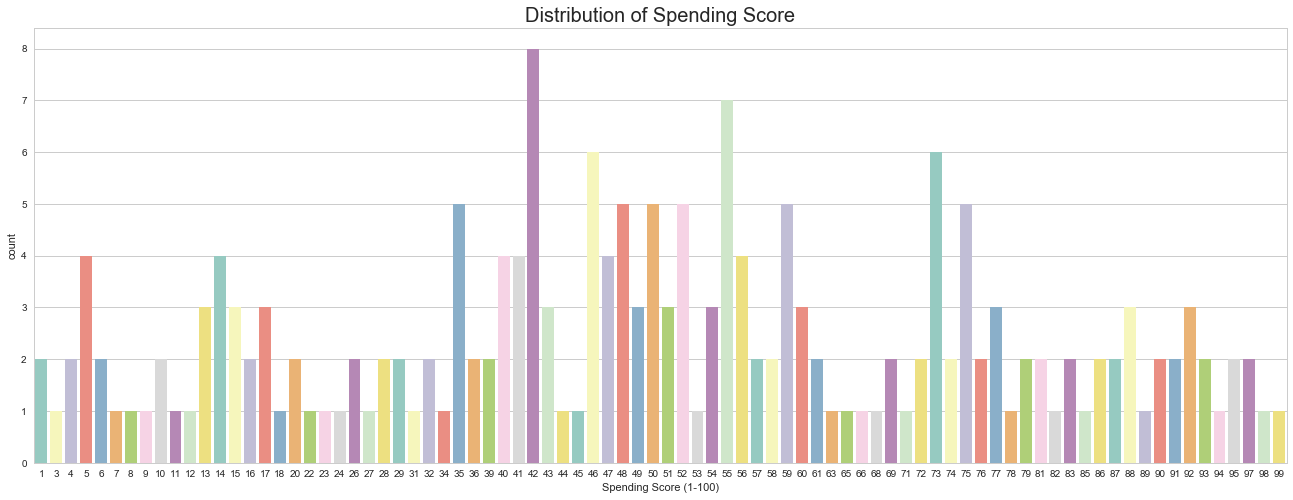

In [73]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Spending Score (1-100)'], palette = 'Set3')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

Above plot shows that there are variety of customers with varying needs in the Mall. Most of the customers have 35-60. Some of the customers have low score as 5 while some of them even high score as 97-99 also.

<function matplotlib.pyplot.show>

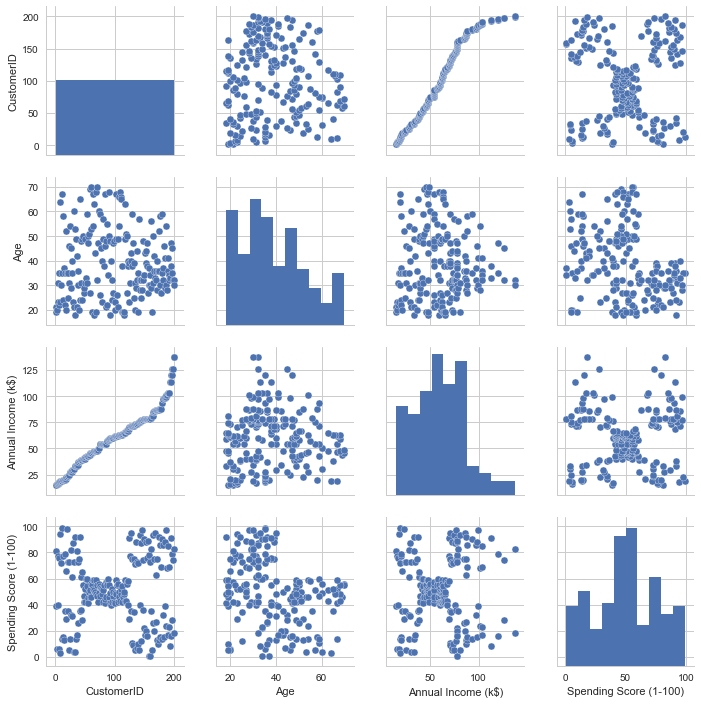

In [74]:
sns.pairplot(data)
plt.show

Pair plots show that:
CustomerID is highly correlated with Annunal Income
Annual Income with Spending Score forms together an interesting picture. 
Age and Annual Income distribution don't seems like normal. They are both shifted to left. 
Spending Score, at first glance, has too large tails to be normal. 

<function matplotlib.pyplot.show>

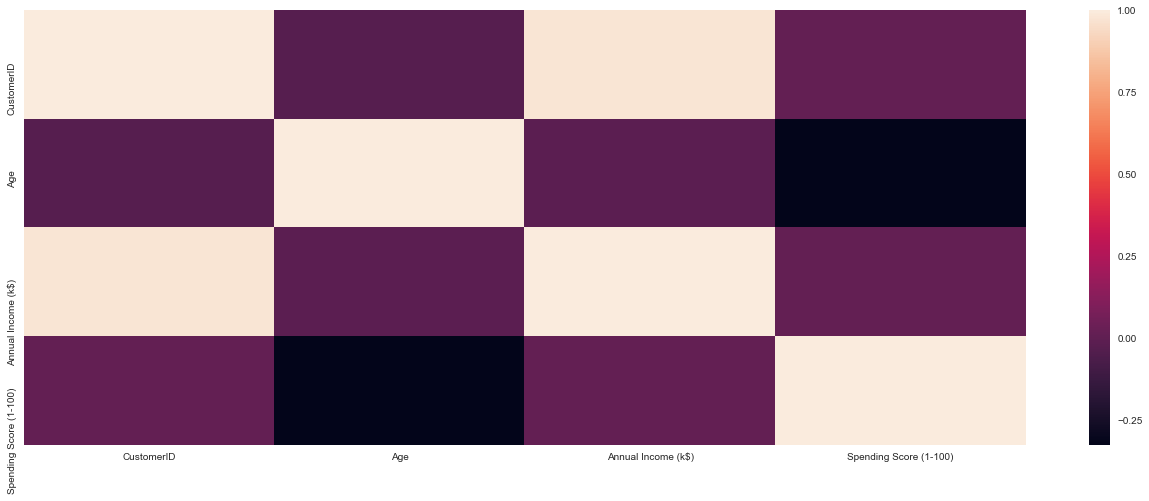

In [75]:
sns.heatmap(data.corr())
plt.show

Here,these attributes do not have good correlation among them, that's why we will proceed with all of the features (also linear regression is not a good option for this data)

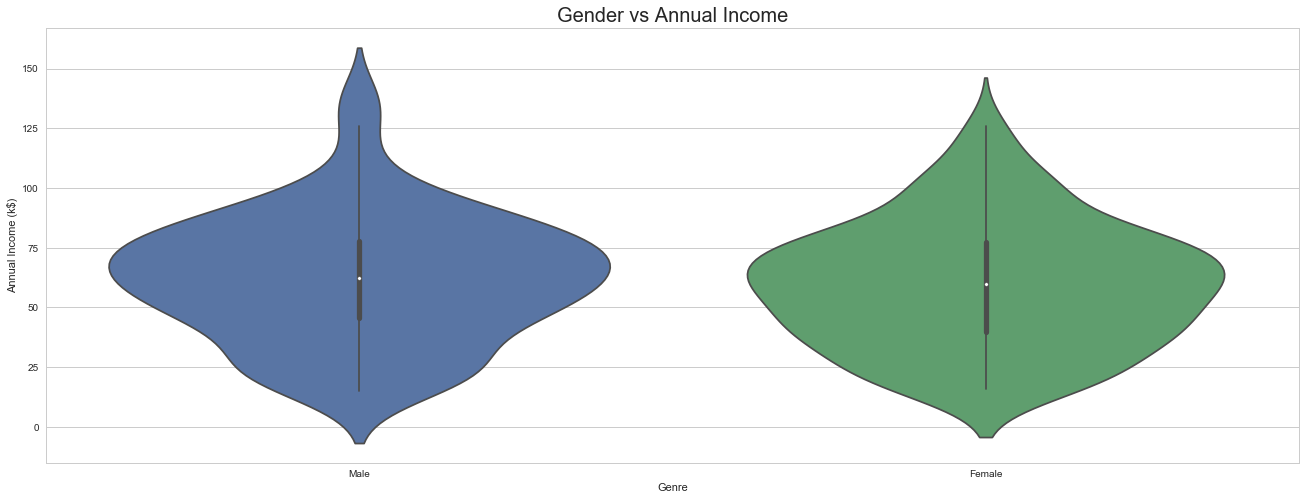

In [76]:
sns.violinplot('Genre','Annual Income (k$)', data=data)
plt.title('Gender vs Annual Income', fontsize = 20)
plt.show()

Above plots show that the annual income of Males were higher than female customers

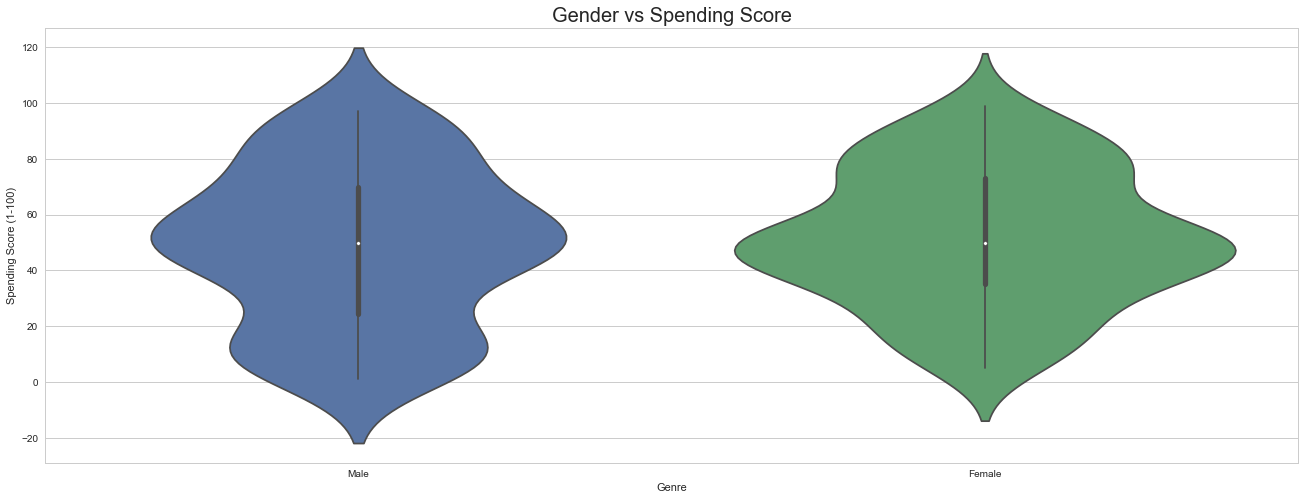

In [77]:
sns.violinplot('Genre','Spending Score (1-100)', data=data)
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

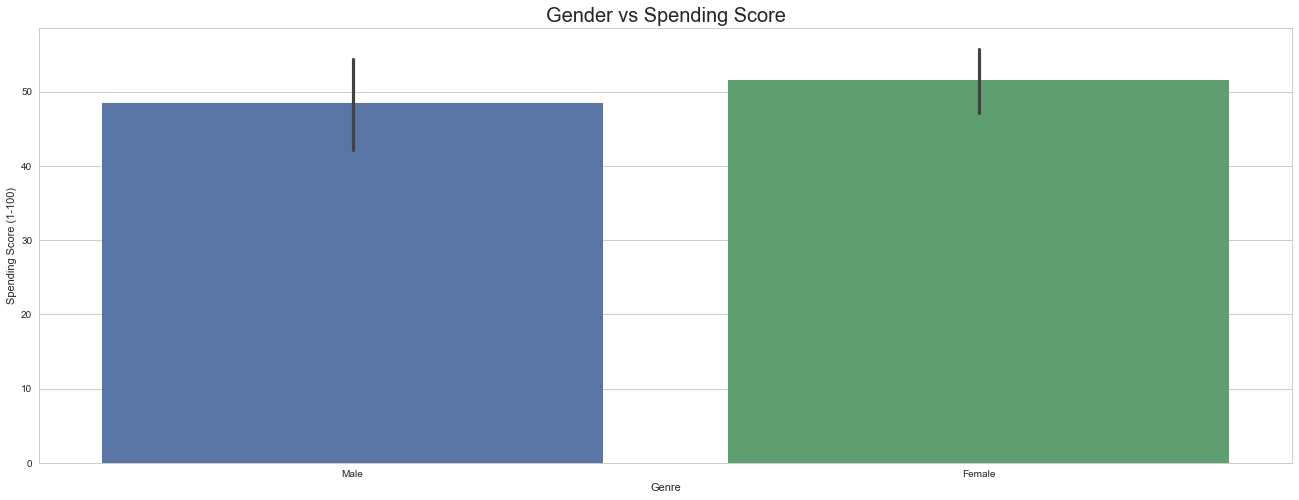

In [78]:
sns.barplot('Genre','Spending Score (1-100)', data=data)
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

It could be easily infered from above plots that although annual income is high for Males but females have more spending scores as compared to male customers

# Model Building

In [79]:
x = data.iloc[:, [3, 4]].values


## Kmeans Algorithm

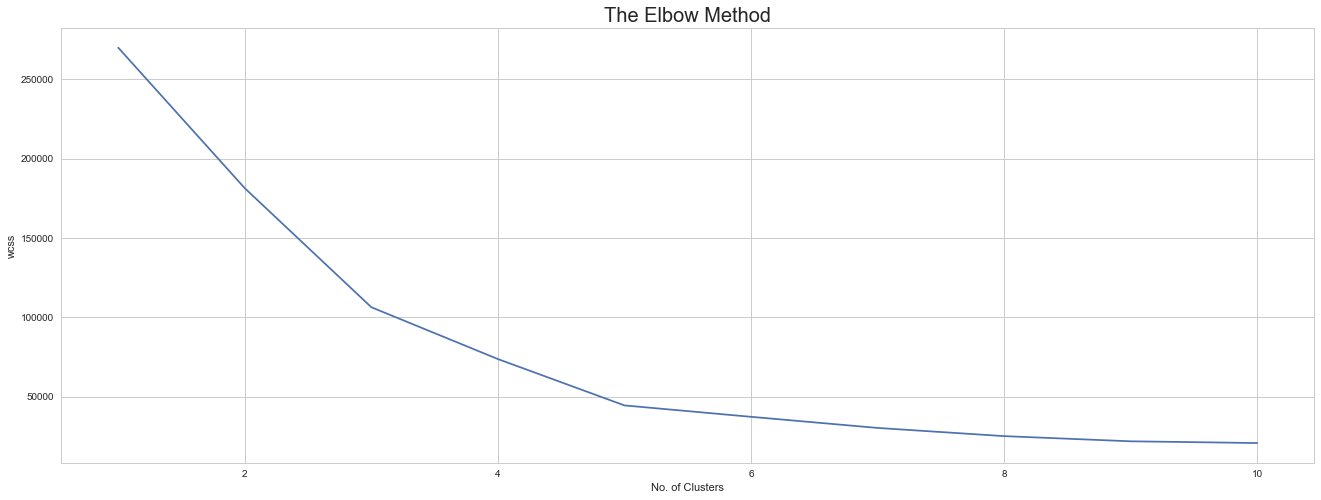

In [80]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [81]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [82]:
# It predicts the cluster number to which the datapoint belongs to
test=kmeans.predict(np.asarray([[3,3]]))
test[0]

2

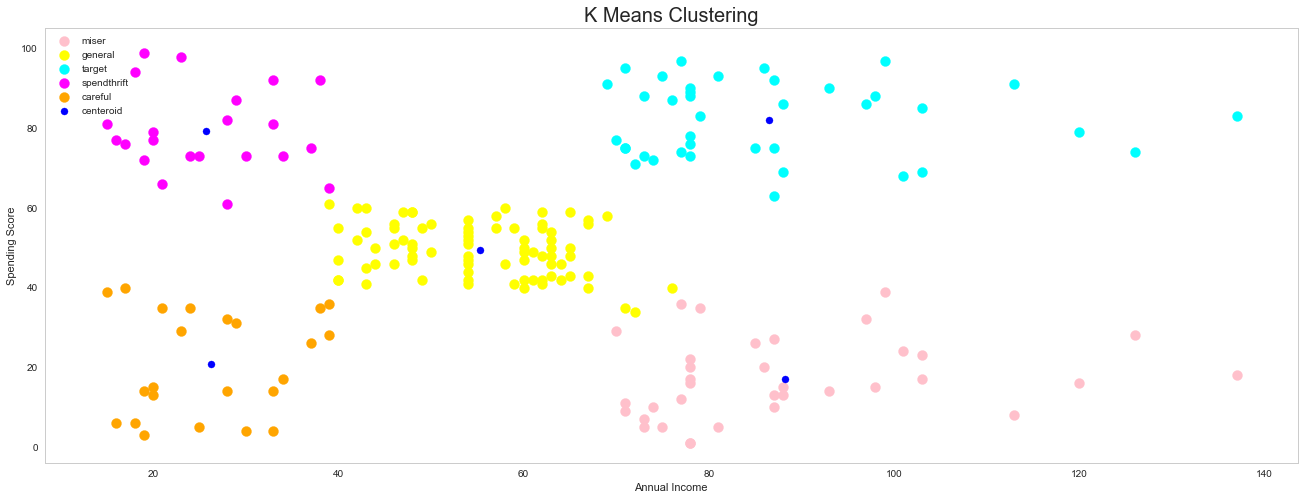

In [83]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

0.553931997445


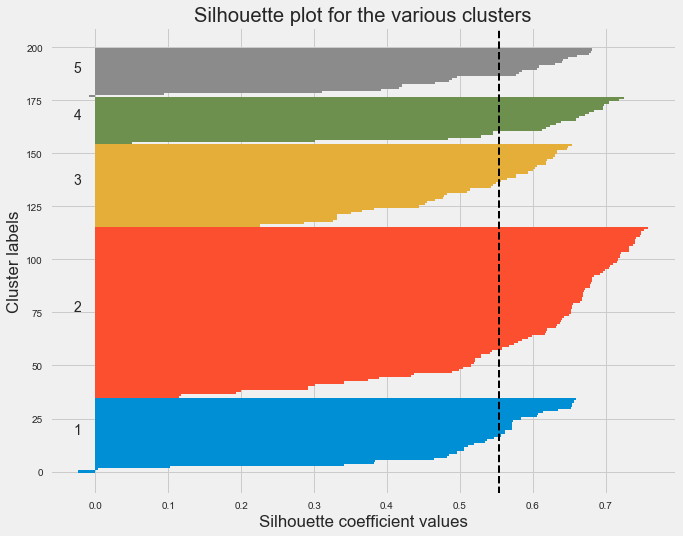

In [84]:
from sklearn.metrics import silhouette_samples, silhouette_score
#for i, k in enumerate([0, 1, 2, 3, 4]):
#    fig, (ax) = plt.subplots(1, 1)
plt.figure(figsize=(10,8))
# Get silhouette samples
silhouette_vals = silhouette_samples(x, y_means)

# Silhouette plot
#y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(y_means)):
        cluster_silhouette_vals = silhouette_vals[y_means == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        plt.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
avg_score = np.mean(silhouette_vals)
plt.axvline(avg_score, linestyle='--', linewidth=2, color='black')
plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster labels')
plt.title('Silhouette plot for the various clusters');
    
    
print(avg_score)

In [85]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as hir

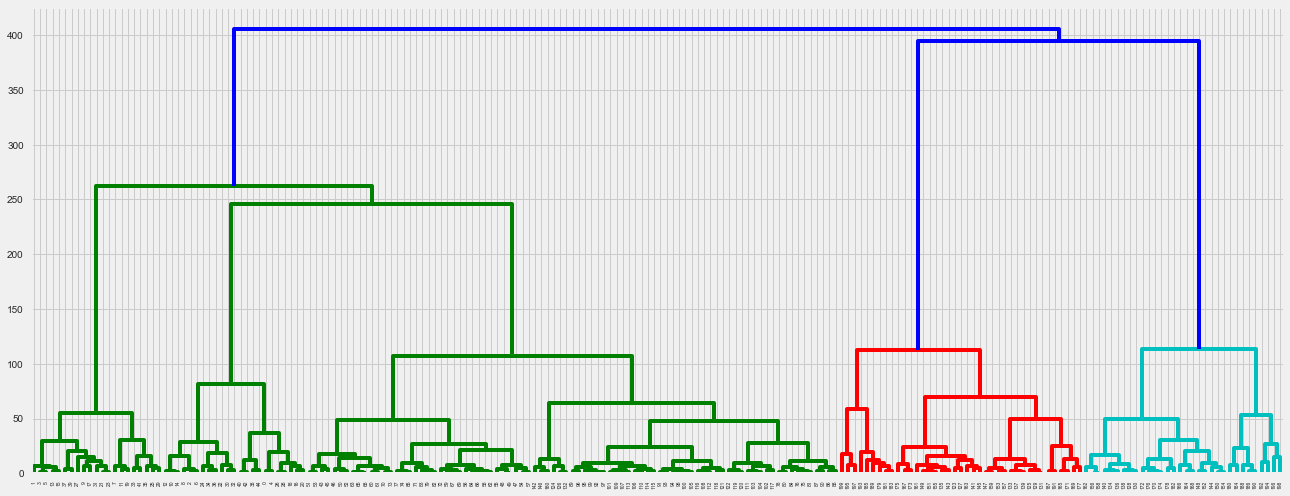

In [86]:
dendrogram = hir.dendrogram(hir.linkage(x, method='ward'))

In [87]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hc.fit_predict(x)
labels = hc.labels_
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2], dtype=int64)

In [88]:
data['labels'] = labels

In [89]:
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),labels
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [90]:
data.groupby(['labels'])

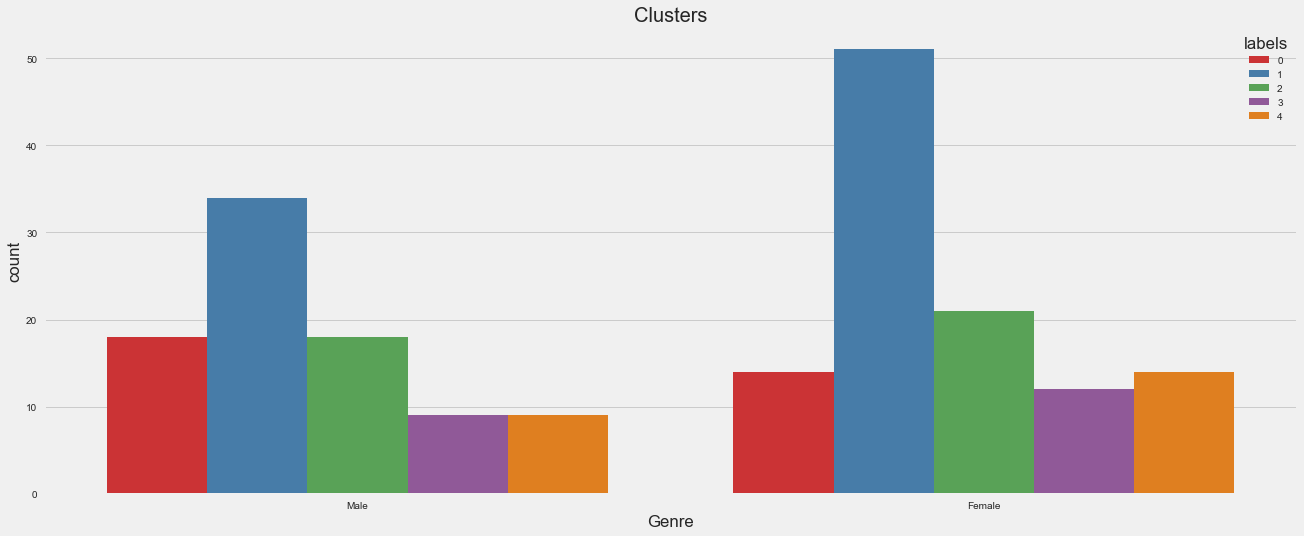

In [91]:
sns.countplot(data['Genre'], hue = data['labels'], palette = 'Set1')
plt.title('Clusters', fontsize = 20)
plt.show()

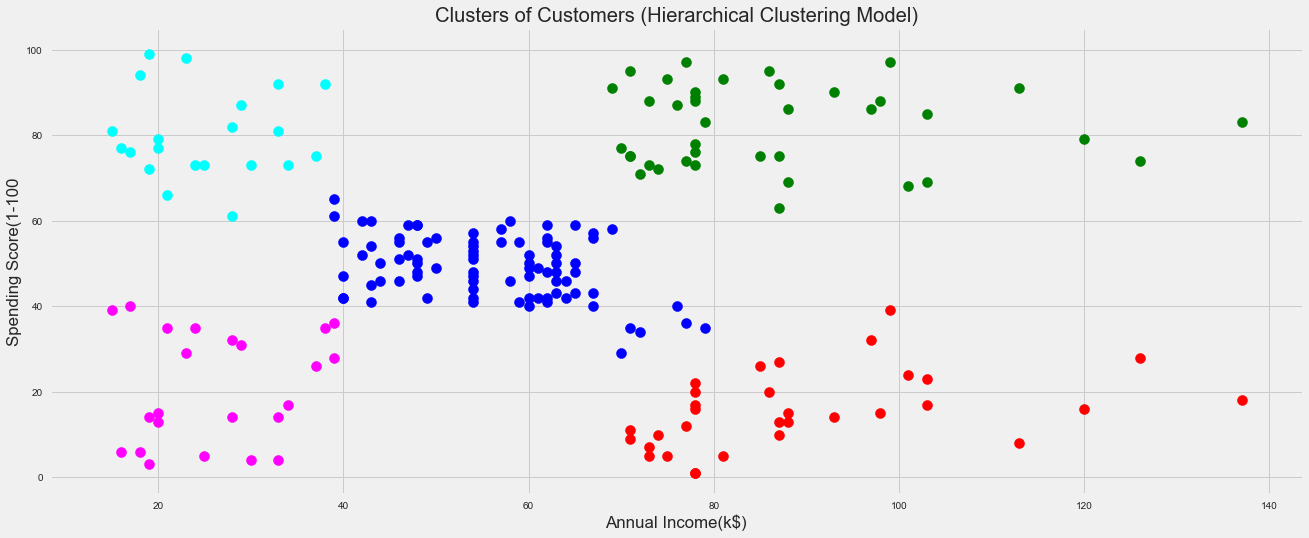

In [92]:
plt.scatter(x[labels==0, 0], x[labels==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(x[labels==1, 0], x[labels==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(x[labels==2, 0], x[labels==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(x[labels==3, 0], x[labels==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(x[labels==4, 0], x[labels==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

Based on above plot, 
we could group customers as 
Cluster 1 (Red)     High Income vs Low Spending Score            Careful
Cluster 2 (Blue)    Normal Income vs Normal Spending Score       Average
Cluster 3 (Green)   High Income vs Low Spending Score            Target
Cluster 4 (Cyan)    Low Income vs Hign Spending Score            Careless
Cluster 5 (Magenta) High Income vs Low Spending Score            Sensible

0.552994595515


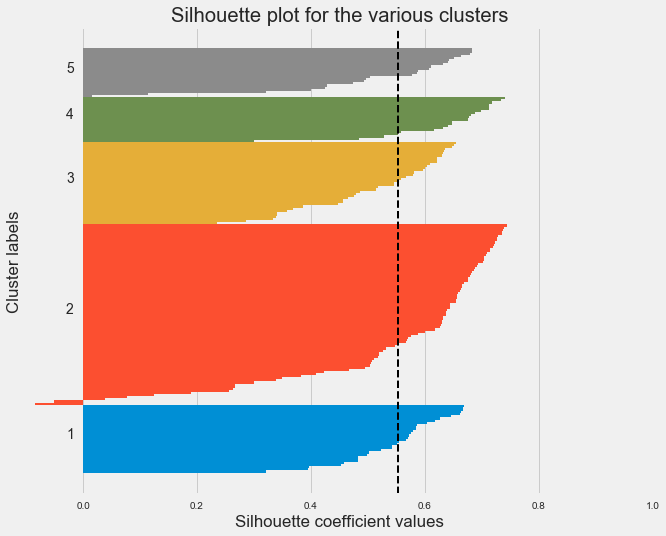

In [94]:
from sklearn.metrics import silhouette_samples, silhouette_score
#for i, k in enumerate([0, 1, 2, 3, 4]):
#    fig, (ax) = plt.subplots(1, 1)
plt.figure(figsize=(10,8))
# Get silhouette samples
silhouette_vals = silhouette_samples(x, labels)

# Silhouette plot
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        plt.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
avg_score = np.mean(silhouette_vals)
plt.axvline(avg_score, linestyle='--', linewidth=2, color='black')
plt.yticks([])
plt.xlim([-0.1, 1])
plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster labels')
plt.title('Silhouette plot for the various clusters');
    
    
print(avg_score)

In [98]:
sklearn.metrics.silhouette_score(x, labels, metric='euclidean', sample_size=None, random_state=None)

0.55299459551488972